
## **1. Install opensr_degradation package**

In [ ]:
!pip install opensr_degradation
!pip install rasterio

In [2]:
import matplotlib.pyplot as plt
import opensr_degradation as deg
import rasterio as rio
import gdown
import torch

device = "cuda"

## **2. Load demo data**

In [3]:
gdown.download("https://drive.google.com/uc?id=1q3eC6JW2GAQ6lAothkLgK-LfgYdUDLq_", "demo.tif")

with rio.open("demo.tif") as src:
    hr_1 = torch.from_numpy(src.read()).float()/255
    hr_1 = hr_1.to(device)

Downloading...
From: https://drive.google.com/uc?id=1q3eC6JW2GAQ6lAothkLgK-LfgYdUDLq_
To: /content/demo.tif
100%|██████████| 4.81M/4.81M [00:00<00:00, 67.3MB/s]


## **3. Load models**

In [4]:
blur_model = deg.BlurModel("gaussian", device=device)
reflectance_model = deg.ReflectanceModel(correction="linear", device=device)
noise_model = deg.NoiseModel(method="simple", device=device)

## **4. Run inference**

In [5]:
with torch.no_grad():
    lr_1 = blur_model(hr_1)
    lr_2, hr_2 = reflectance_model(lr_1, hr_1)
    lr_3 = lr_2 + noise_model(lr_2)

## **5. Display results**

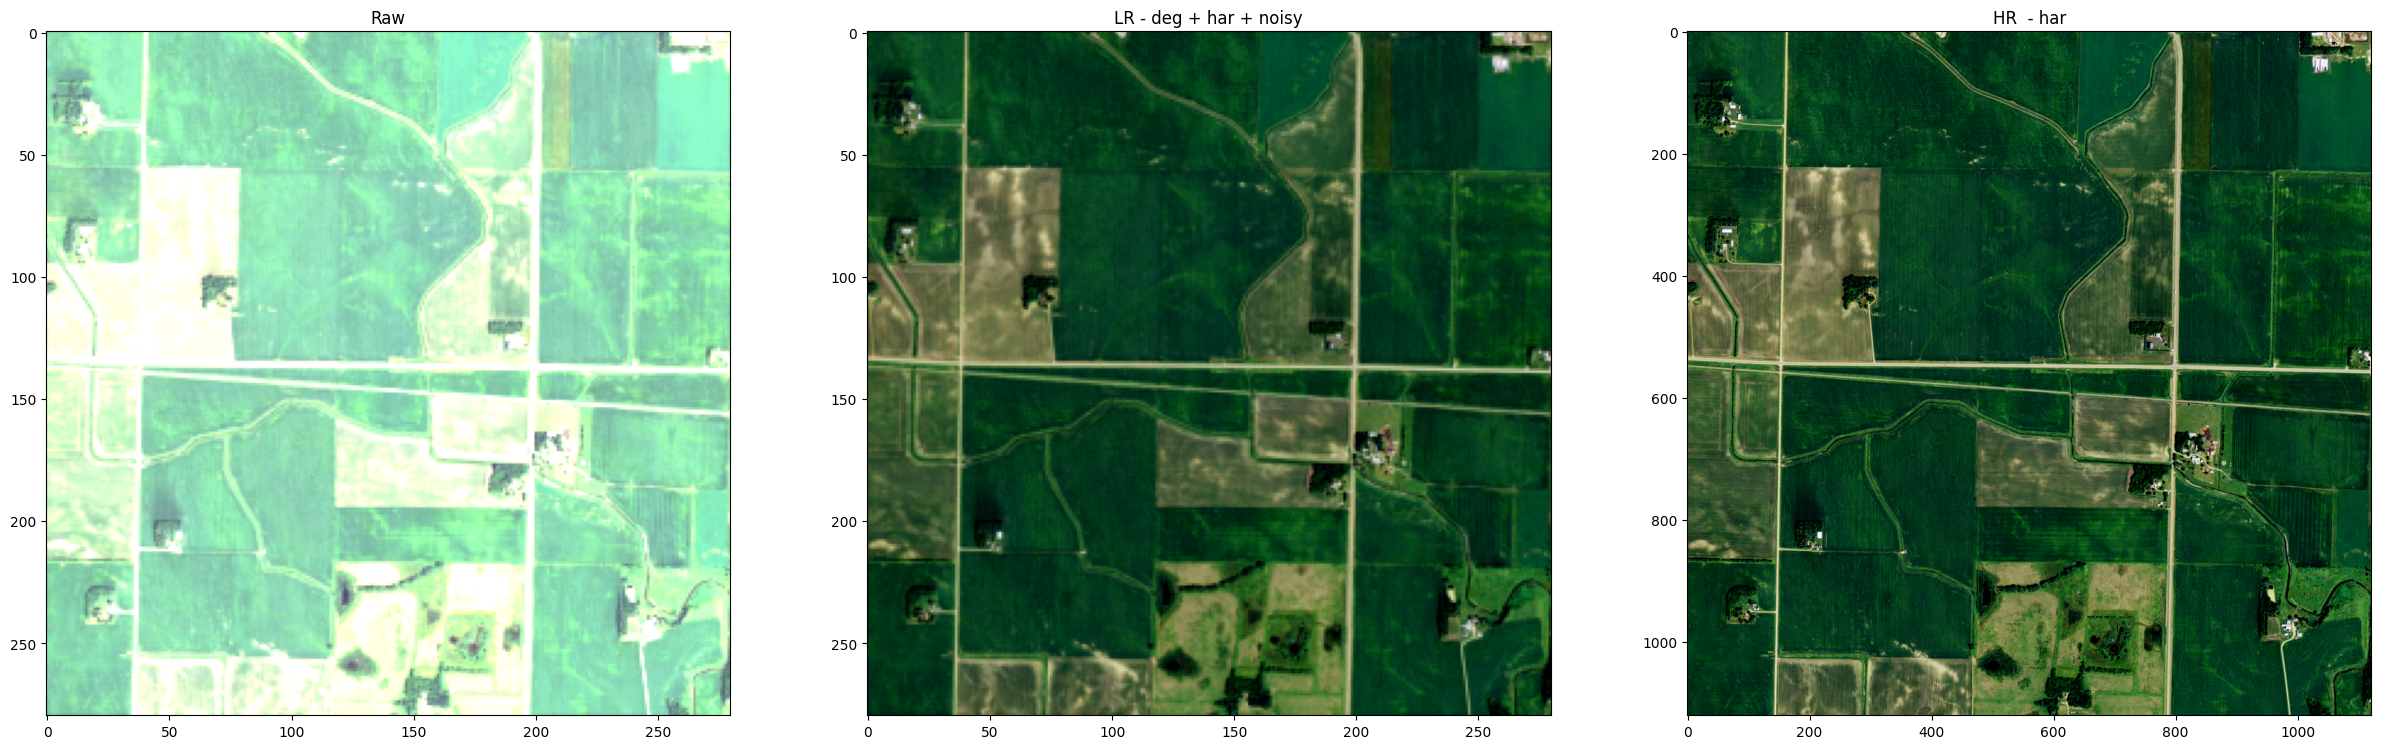

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15*2, 5*2))
ax[0].imshow(lr_1[[0, 1, 2]].permute(1, 2, 0).detach().cpu().numpy()*2)
ax[0].set_title("Raw")
ax[1].imshow(lr_3[[0, 1, 2]].permute(1, 2, 0).detach().cpu().numpy()*2)
ax[1].set_title("LR - deg + har + noisy")
ax[2].imshow(hr_2[[0, 1, 2]].permute(1, 2, 0).detach().cpu().numpy()*2)
ax[2].set_title("HR  - har")
plt.show()